<a href="https://colab.research.google.com/github/garyfoohw/GA_DSIF_1_01-lab-pokemon/blob/master/ULD_obj_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Roboflow Notebooks](https://ik.imagekit.io/roboflow/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv8 Object Detection on a Custom Dataset

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## ⚠️ Disclaimer

YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **18.01.2023** with version **YOLOv8.0.9**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading the blog post on how to train YOLOv8 Object Detection, concurrently.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Sat Jan 28 05:54:22 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    22W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **18.01.2023** with version **YOLOv8.0.9**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [4]:
# Pip install method (recommended)

!pip install ultralytics roboflow

import shutil
from datetime import datetime

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.22 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.6/78.2 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from roboflow import Roboflow
rf = Roboflow(api_key="K2n7qLvKYdUVKbsZZhNL")
project = rf.workspace("uld-ttkny").project("uld_obj_detect")
dataset = project.version(5).download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.22, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to ULD_obj_detect-5 in yolov8:: 100%|██████████| 295/295 [00:00<00:00, 356.65it/s]


## Custom Training

In [7]:
%cd {HOME}

model=YOLO("yolov8x.pt")
model.train(task="detect",data=os.path.join(dataset.location,"data.yaml"),epochs=100)

# !yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25

/content


  0%|          | 0.00/131M [00:00<?, ?B/s]


Ultralytics YOLOv8.0.22 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8x.yaml, data=/content/datasets/ULD_obj_detect-5/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=Fals

  0%|          | 0.00/755k [00:00<?, ?B/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.Conv                  [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.Conv                  [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.C2f                   [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.Conv                  [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.C2f                   [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.Conv                  [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.C2f                   [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytic

In [8]:
#Copy best.pt to google drive
dt_now=datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
shutil.copy("/content/runs/detect/train/weights/best.pt",
            f"/content/gdrive/MyDrive/ULD/best_detect_{dt_now}.pt")

'/content/gdrive/MyDrive/ULD/best_detect_2023-01-28-07-36-32.pt'

In [9]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png
confusion_matrix.png				    results.csv
events.out.tfevents.1674885388.aa02fd4e8a42.1560.0  val_batch0_labels.jpg
F1_curve.png					    val_batch0_pred.jpg
P_curve.png					    weights
PR_curve.png


/content


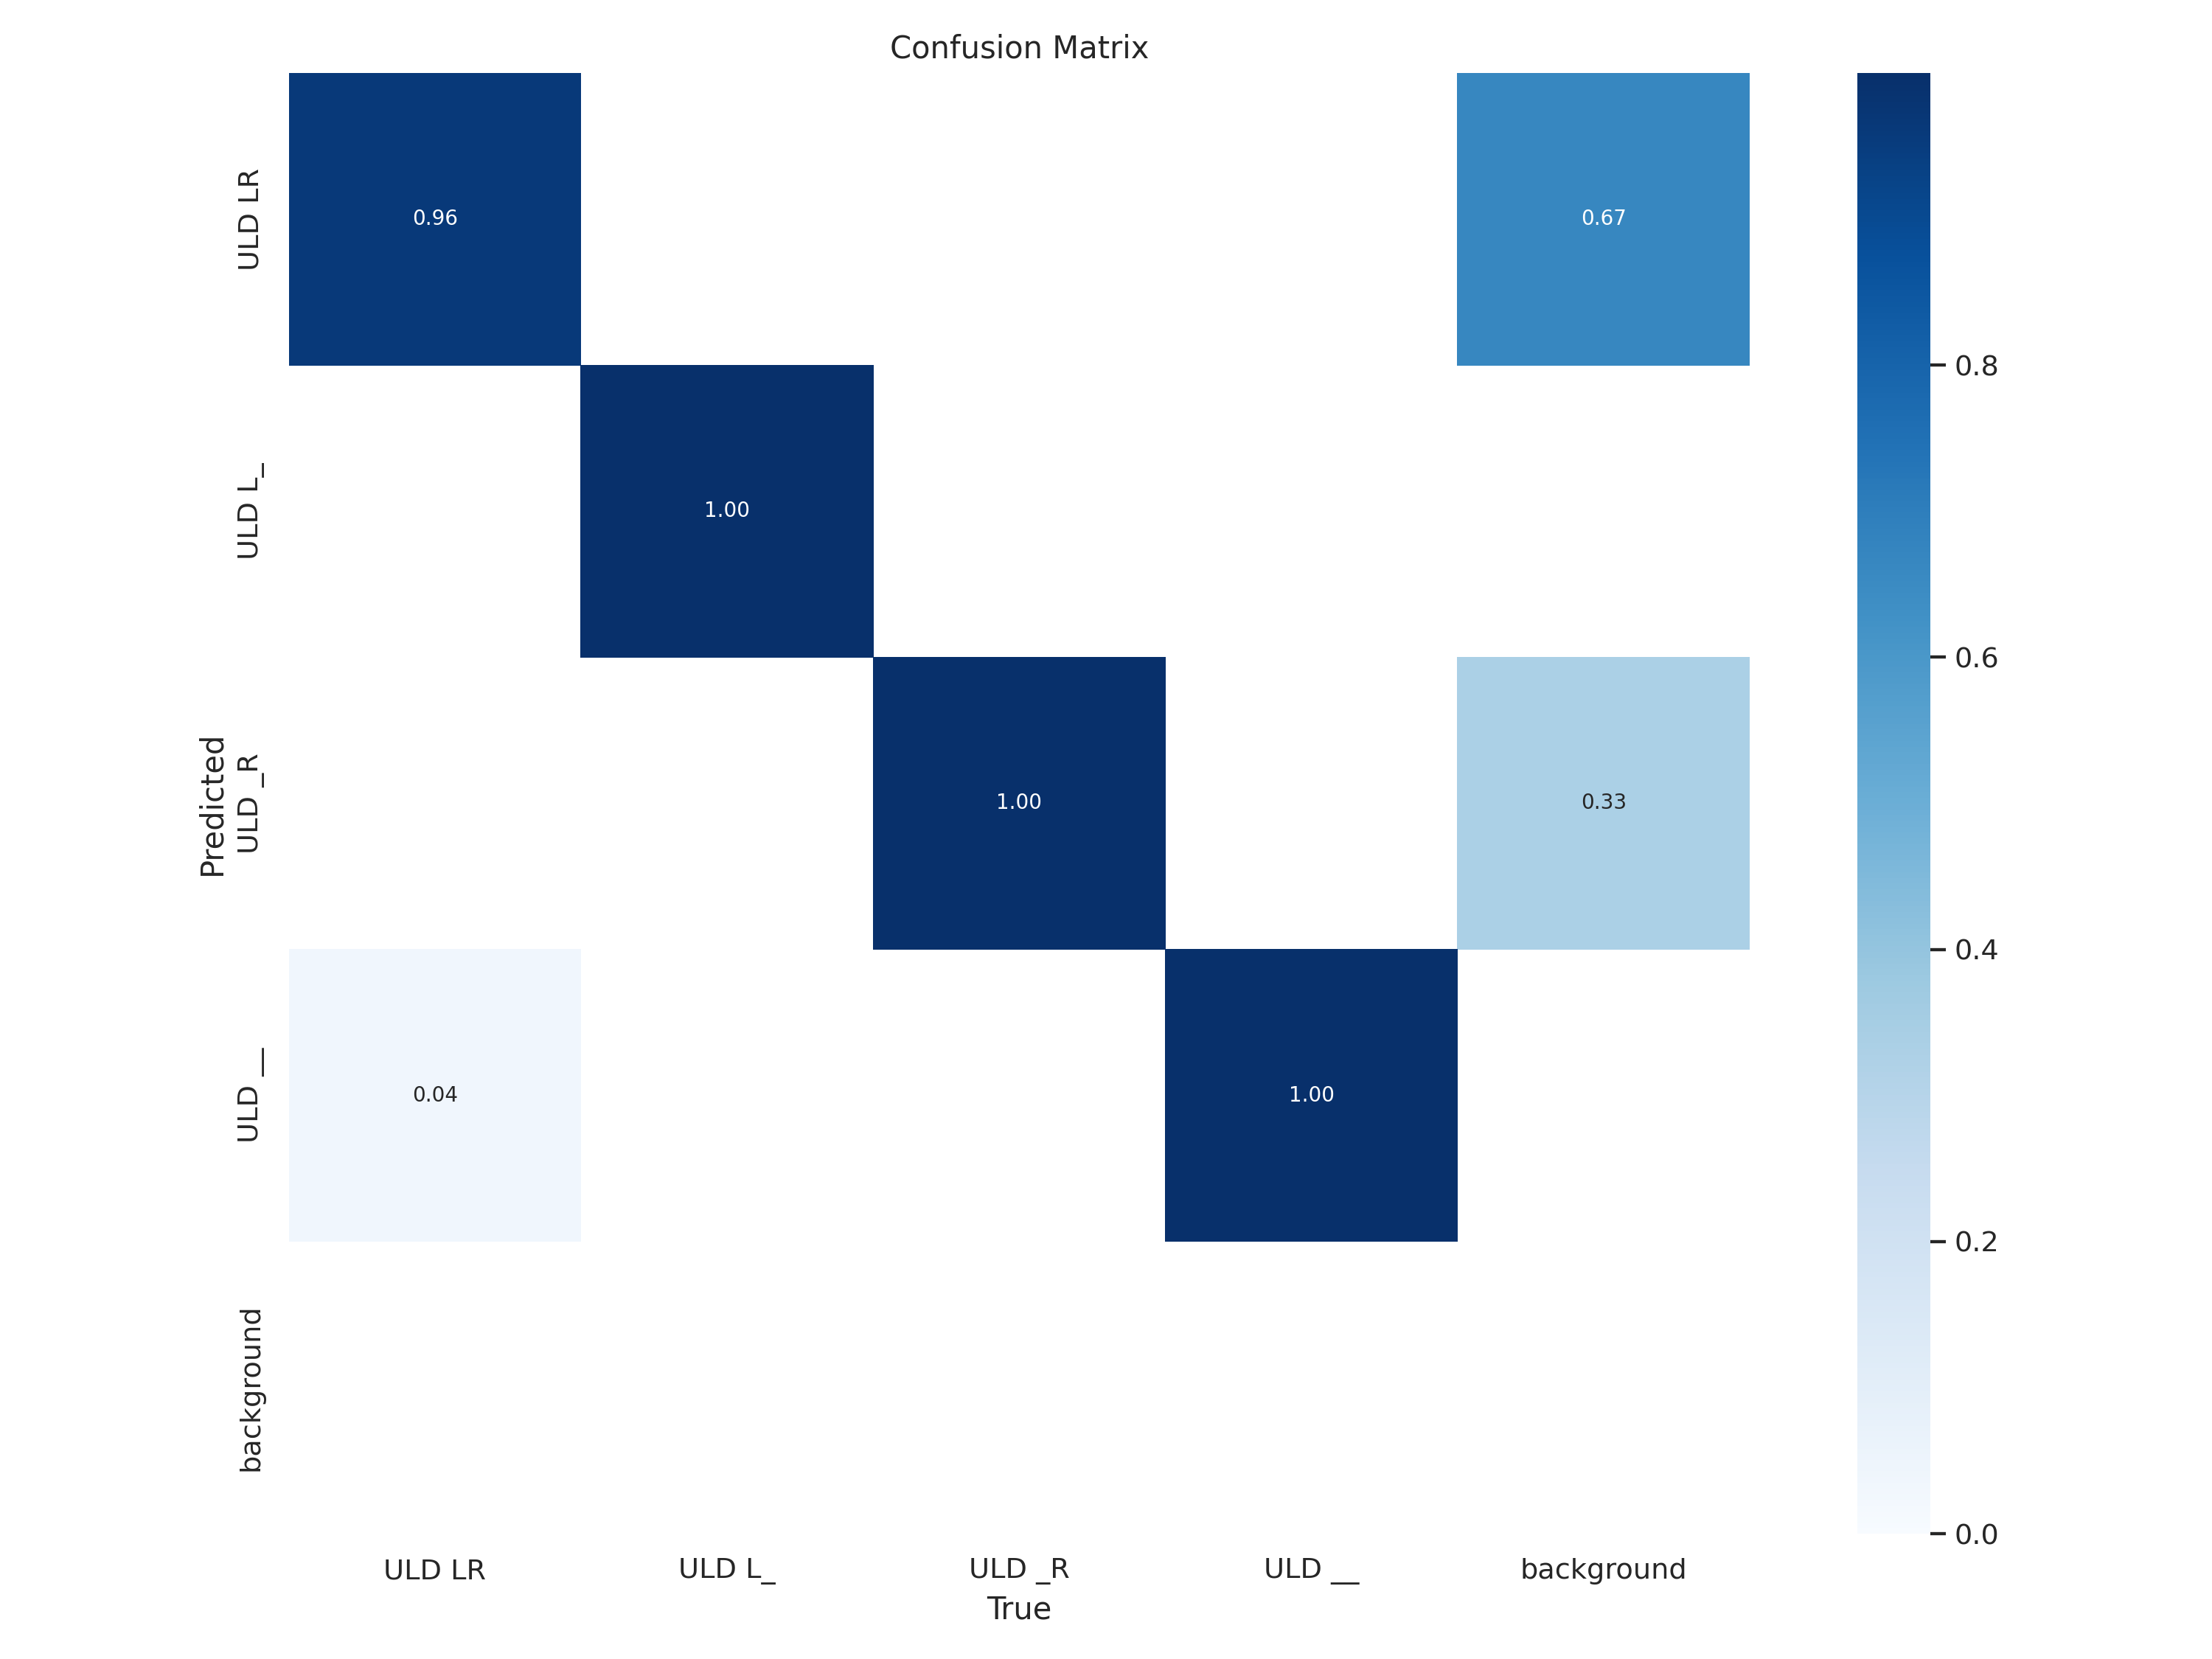

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

In [11]:
#adapted from YOLOv5

from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd

def plot_results(file='path/to/results.csv', dir=''):
    # Plot training results.csv. Usage: from utils.plots import *; plot_results('path/to/results.csv')
    save_dir = Path(file).parent if file else Path(dir)
    fig, ax = plt.subplots(2, 5, figsize=(12, 6), tight_layout=True)
    ax = ax.ravel()
    files = list(save_dir.glob('results*.csv'))
    assert len(files), f'No results.csv files found in {save_dir.resolve()}, nothing to plot.'
    for f in files:
        try:
            data = pd.read_csv(f)
            s = [x.strip() for x in data.columns]
            x = data.values[:, 0]
            for i, j in enumerate([1, 2, 3, 4, 5, 8, 9, 10, 6, 7]):
                y = data.values[:, j].astype('float')
                # y[y == 0] = np.nan  # don't show zero values
                ax[i].plot(x, y, marker='.', label=f.stem, linewidth=2, markersize=8)
                ax[i].set_title(s[j], fontsize=12)
                # if j in [8, 9, 10]:  # share train and val loss y axes
                #     ax[i].get_shared_y_axes().join(ax[i], ax[i - 5])
        except Exception as e:
            print(f'Warning: Plotting error for {f}: {e}')
    ax[1].legend()
    fig.savefig(save_dir / 'results.png', dpi=200)
    plt.close()

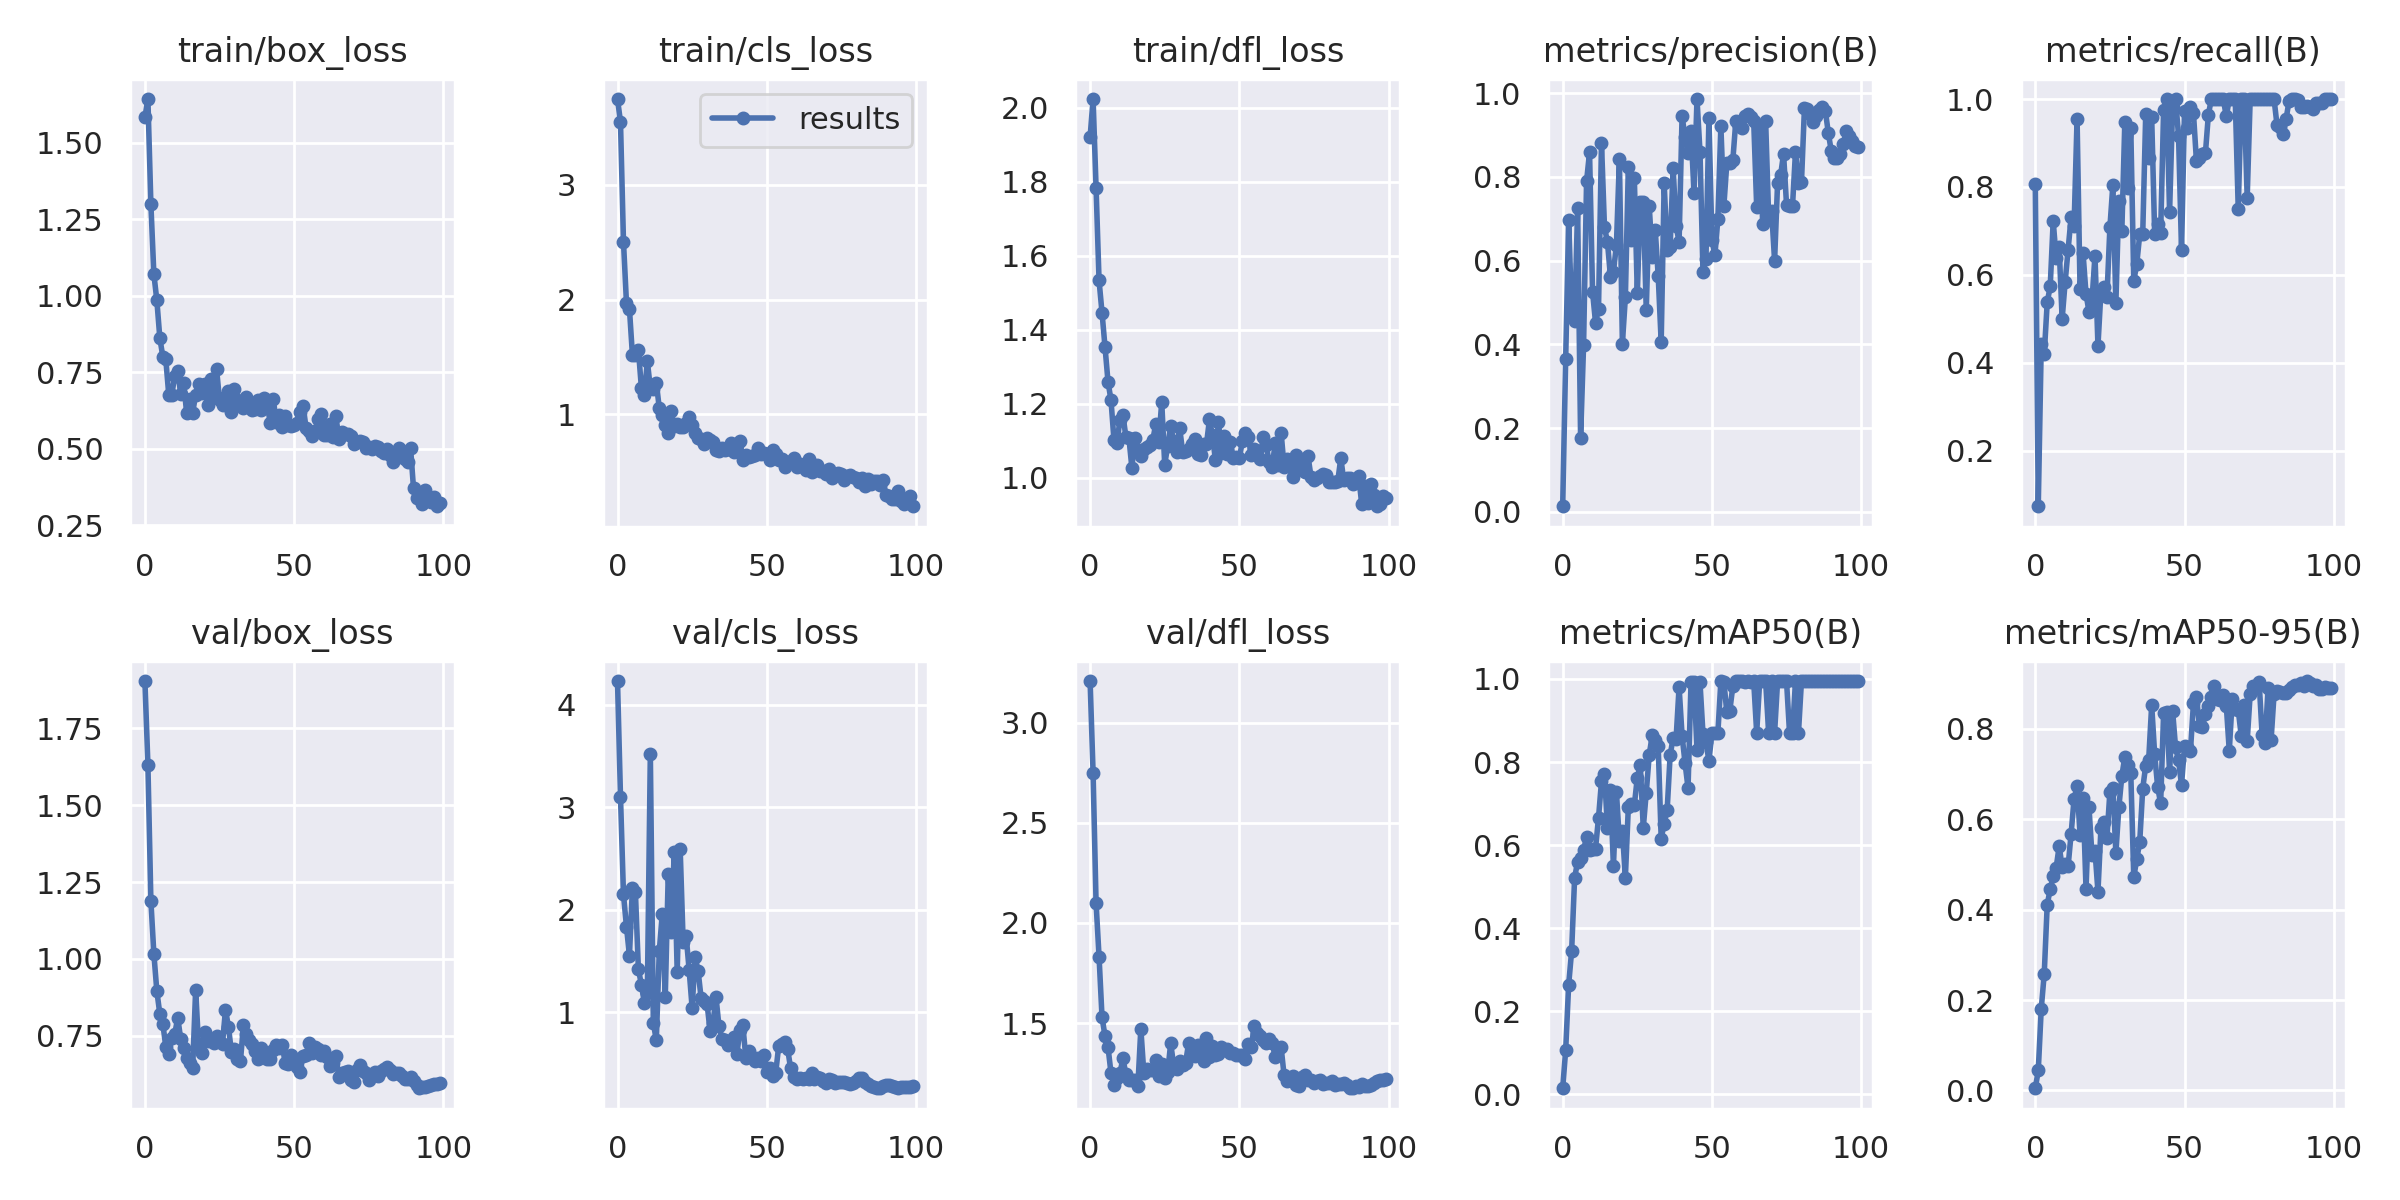

In [13]:
# from utils.plots import plot_results
plot_results(f'{HOME}/runs/detect/train/results.csv')
# %cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000)

/content


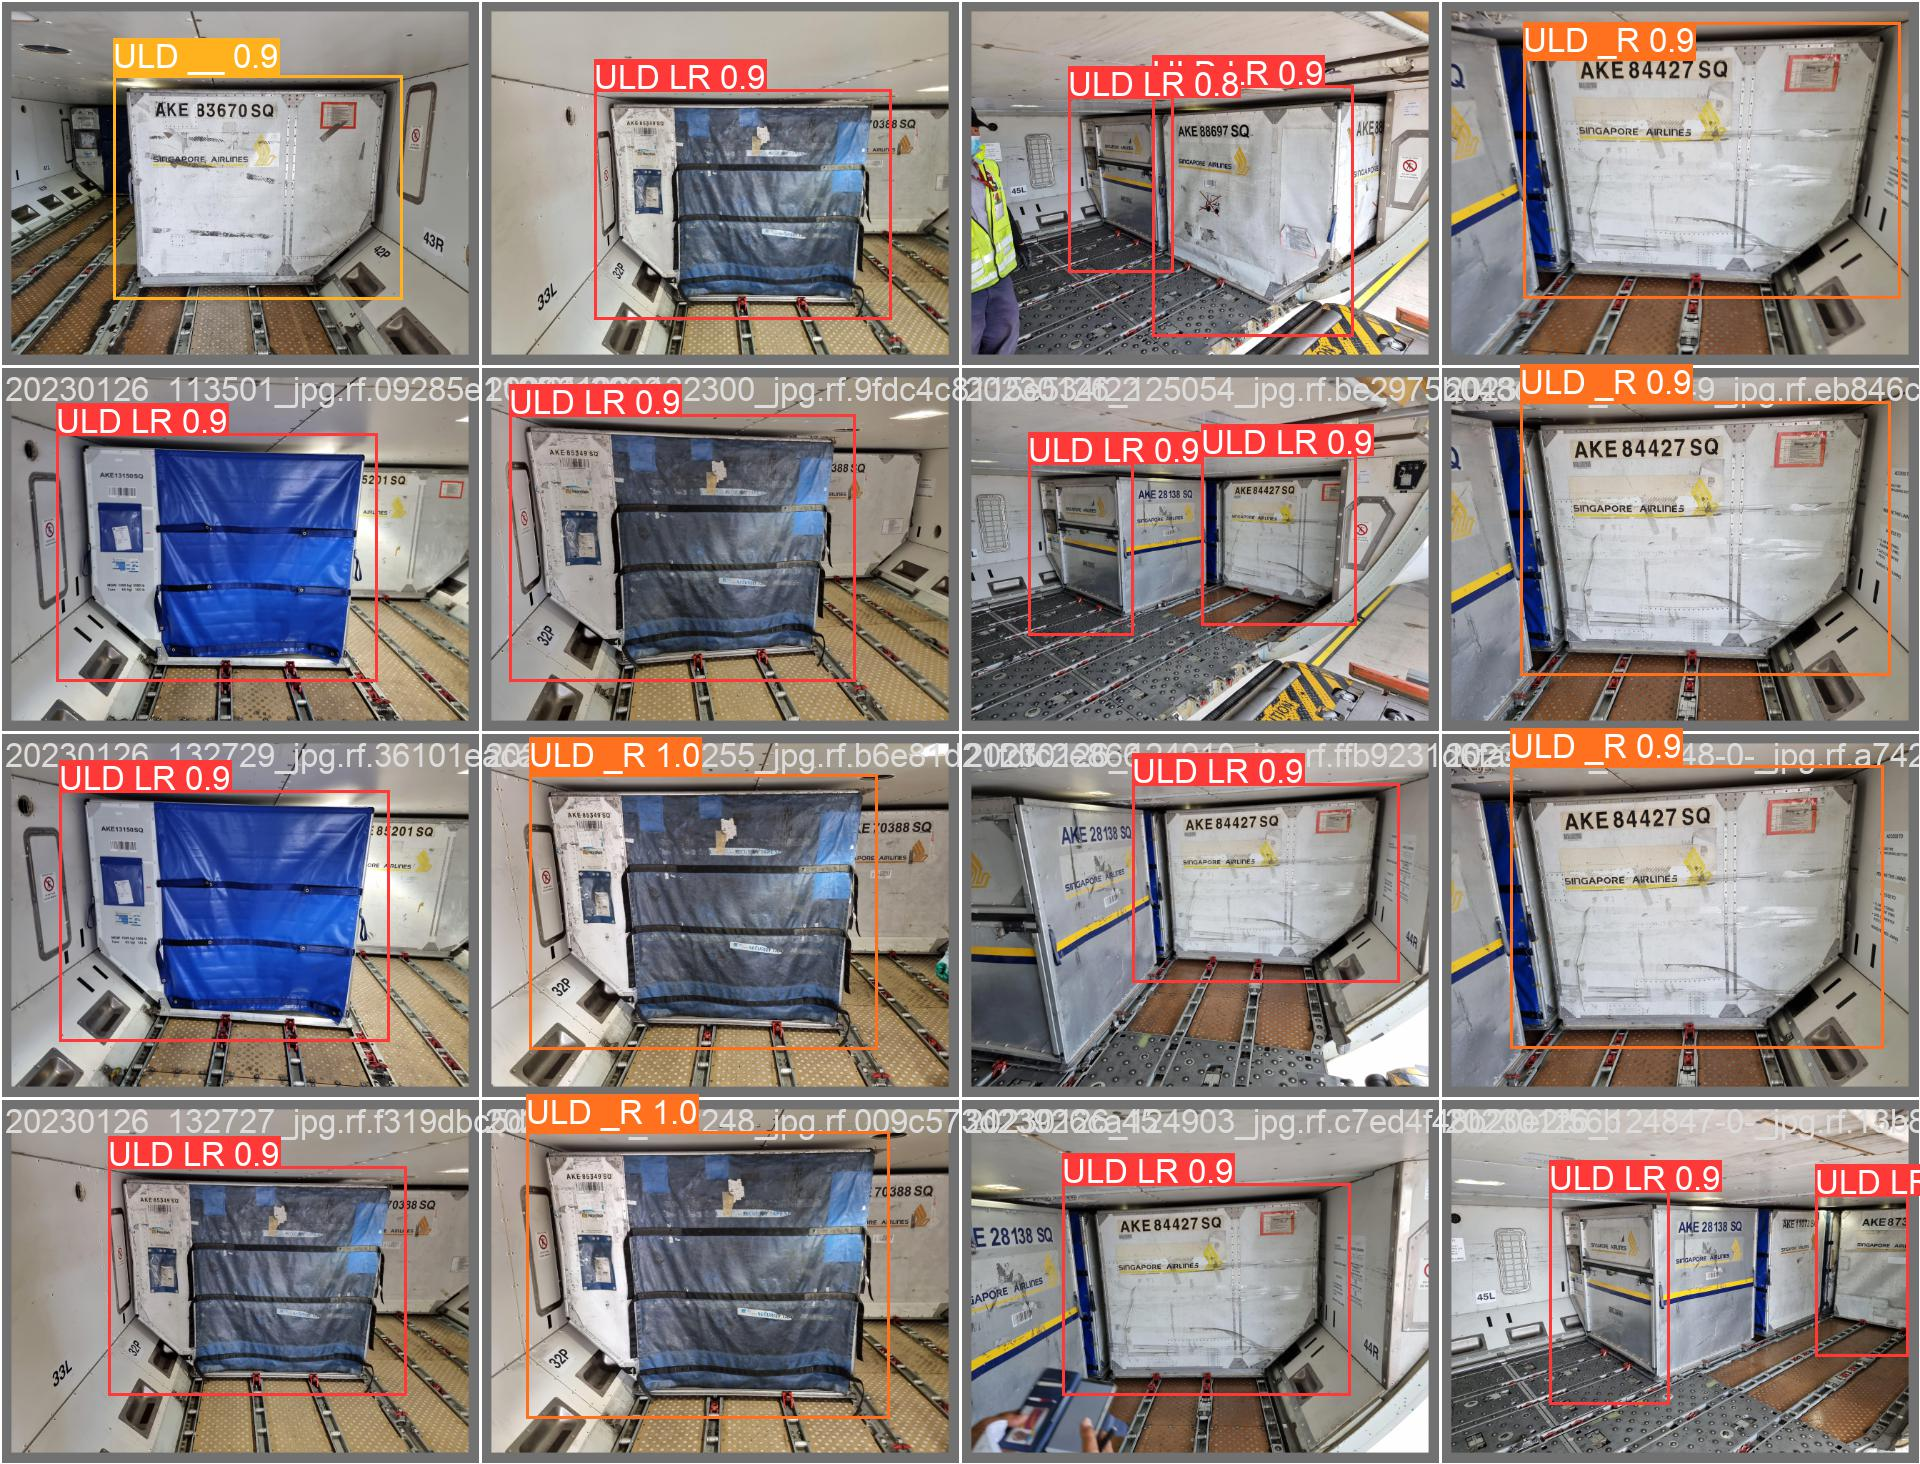

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

%cd {HOME}

model = YOLO(os.path.join(HOME,"runs","detect","train","weights","best.pt"))
_=model.predict(task="detect",source=os.path.join(dataset.location,"data.yaml"), save_crop=False)

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

## Inference with Custom Model

In [15]:
%cd {HOME}

model = YOLO(os.path.join(HOME,"runs","detect","train","weights","best.pt"))
_=model.predict(task="detect",source=os.path.join(dataset.location,"test","images"), save_crop=False)

# !yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

/content


Ultralytics YOLOv8.0.22 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 268 layers, 68127420 parameters, 0 gradients, 257.4 GFLOPs
image 1/20 /content/datasets/ULD_obj_detect-5/test/images/20230126_113507_jpg.rf.f2906889fb0a24dfe7f21f26783e92e5.jpg: 480x640 1 ULD __, 69.0ms
image 2/20 /content/datasets/ULD_obj_detect-5/test/images/20230126_113751_jpg.rf.6117868b104bd89888cc61607f37a8aa.jpg: 480x640 2 ULD LRs, 68.3ms
image 3/20 /content/datasets/ULD_obj_detect-5/test/images/20230126_114440_jpg.rf.a4a06a881eb31672a3fd49ef8a126313.jpg: 480x640 2 ULD LRs, 68.3ms
image 4/20 /content/datasets/ULD_obj_detect-5/test/images/20230126_121239_jpg.rf.79528a2d98db5797a18288d6afd7ffdb.jpg: 480x640 1 ULD LR, 1 ULD __, 68.1ms
image 5/20 /content/datasets/ULD_obj_detect-5/test/images/20230126_121619_jpg.rf.68faa032f53ea9ddbc0673a261b49d1e.jpg: 480x640 1 ULD _R, 68.3ms
image 6/20 /content/datasets/ULD_obj_detect-5/test/images/20230126_121811_jpg.rf.49edd9334118beca3b

**NOTE:** Let's take a look at few results.

In [16]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=300))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")